In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
boston = datasets.load_boston()

In [5]:
X, y = shuffle(boston.data, boston.target, random_state=13)

In [6]:
X = X.astype(np.float32)
offset = int(X.shape[0]* 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [10]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
         'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)


In [11]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
mse = mean_squared_error(y_test, clf.predict(X_test))

In [13]:
print("MSE: %.4f" % mse)

MSE: 6.6715


In [17]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [19]:
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

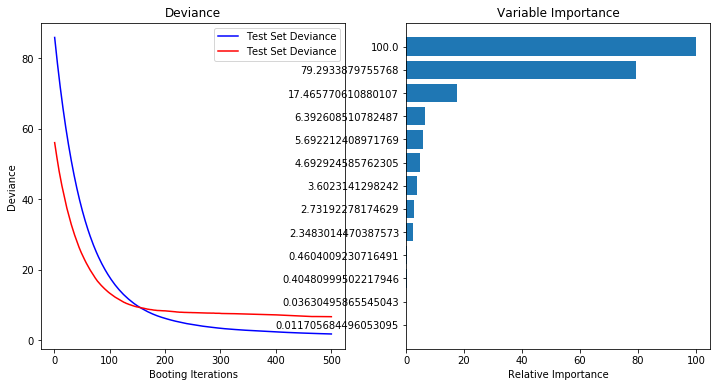

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
        label='Test Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
        label= 'Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Booting Iterations')
plt.ylabel('Deviance')


feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_importance[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()